

# CREDIT CARD FRAUD DETECTION

In [1]:
# importing basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
# reading data
raw_data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**About the dataset:**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days. It contains only numerical input variables which are the result of a PCA transformation. The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
raw_data.isna().sum().any()

False

Luckily, there are no missing values.

In [3]:
raw_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

We have 492 frauds out of 284,807 transactions. Thus, the dataset is highly **unbalanced**, the positive class (frauds) account for 0.172% of all transactions.
To deal with unbalanced dataset, we can upsample minority class or downsample majority class. I choose to downsample majority class as upsampling will create duplicate or fake observations which can divert my model.
Down sampling the majority class involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm. We do it by using resample module from sklearn.

In [4]:
from sklearn.utils import resample,shuffle
df_majority = raw_data[raw_data['Class']==0]
df_minority = raw_data[raw_data['Class']==1]
df_majority_downsampled = resample(df_majority,replace=False,n_samples=492,random_state = 123)
balanced_df = pd.concat([df_minority,df_majority_downsampled])
balanced_df = shuffle(balanced_df)
balanced_df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

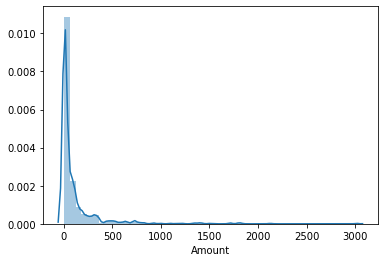

In [5]:
sns.distplot(balanced_df.Amount)

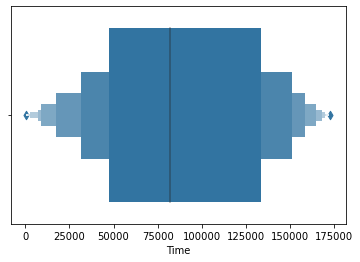

In [6]:
sns.boxenplot(balanced_df.Time)

In [7]:
balanced_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88257.704268,-2.354814,1.793600,-3.532493,2.295678,-1.575886,-0.697604,-2.817221,0.224637,-1.251266,...,0.347330,0.022692,-0.001287,-0.080525,0.005779,0.011693,0.082836,0.031873,108.914045,0.500000
std,47610.901851,5.532291,3.748240,6.212568,3.183240,4.209633,1.765919,5.844693,4.954397,2.346111,...,2.821266,1.190068,1.229455,0.561177,0.684483,0.489997,1.025646,0.442602,252.054612,0.500254
min,406.000000,-30.552380,-17.891256,-31.103685,-5.251492,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.117555,-4.781606,-1.498320,-7.263482,-3.669194,0.000000,0.000000
25%,47406.750000,-2.892574,-0.222215,-5.084967,-0.103452,-1.756283,-1.580290,-3.107826,-0.212570,-2.300885,...,-0.175590,-0.541855,-0.242438,-0.418536,-0.329121,-0.319999,-0.061796,-0.051373,1.290000,0.000000
50%,82088.500000,-0.762690,0.989032,-1.380620,1.307692,-0.474218,-0.667686,-0.711933,0.164934,-0.687562,...,0.173922,0.041249,-0.038770,-0.026193,0.043921,-0.017169,0.046163,0.035156,19.990000,0.500000
75%,133545.750000,1.080633,2.845852,0.277100,4.313236,0.446688,0.080660,0.222890,0.856881,0.221341,...,0.676682,0.593022,0.199694,0.353767,0.390074,0.324995,0.421736,0.208923,99.990000,1.000000
max,172742.000000,2.289916,22.057729,3.866661,12.114672,11.095089,6.474115,7.030177,20.007208,4.906917,...,27.202839,8.361985,12.576469,1.113121,3.018350,2.745261,6.250240,1.779364,3018.500000,1.000000


There is a huge difference between mean values of all the features so it would be better to standardize these.
Standard scaler transform all the features to the same scale and center them using Gaussian distribution. This is important in k-nearest neighbor and distance based omparisons as it puts all features on the same scale before modelling.

In [8]:
from sklearn.preprocessing import StandardScaler

X = balanced_df.drop('Class',axis=1)
y = balanced_df.Class
scaled_X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

Now,we split our data into training and test set. We do this to get accuracy score on unseen data so that we are sure our model has not overfitted training set.

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.3,shuffle=True,random_state=42)
x_train.shape,x_test.shape

((688, 30), (296, 30))

Now we apply various machine learning algorithms to separate fraud and non-fraudalent cases and compare them with help of following two measures:
* Accuracy score is the number of correct predictions made divided by the total number of predictions made.
* The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

In [10]:
# importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier()
}
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(x_train,y_train)
    pred = func.predict(x_test)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results

,Accuracy in %,F1-score
Logistic Regression,96.28,0.96
Decision Tree,93.24,0.93
Random Forest,94.93,0.95
Support Vector Machines,95.61,0.95
K-nearest Neighbors,92.91,0.93
XGBoost,94.59,0.95


All our models have accuracy above 90 and f1-score pretty close to 1.
For more robust models we need to have a large number of observations.